In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("ClusteringHSS.csv")
df.head()

,ID,Gender_Code,Region,Income,Spending
0,1,Female,Rural,20.0,15.0
1,2,Male,Rural,5.0,12.0
2,3,Female,Urban,28.0,18.0
3,4,Male,Urban,40.0,10.0
4,5,Male,Urban,42.0,9.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1113 non-null   int64  
 1   Gender_Code  1107 non-null   object 
 2   Region       1107 non-null   object 
 3   Income       1107 non-null   float64
 4   Spending     1108 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 43.6+ KB


In [4]:
df.isnull().sum()
df = df.drop('ID', axis=1)


In [5]:
data = df.select_dtypes(include=['number'])
data = data.replace([np.inf, -np.inf], np.nan)

data = data.fillna(data.mean())


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [7]:
Z = linkage(scaled_data, method='ward')


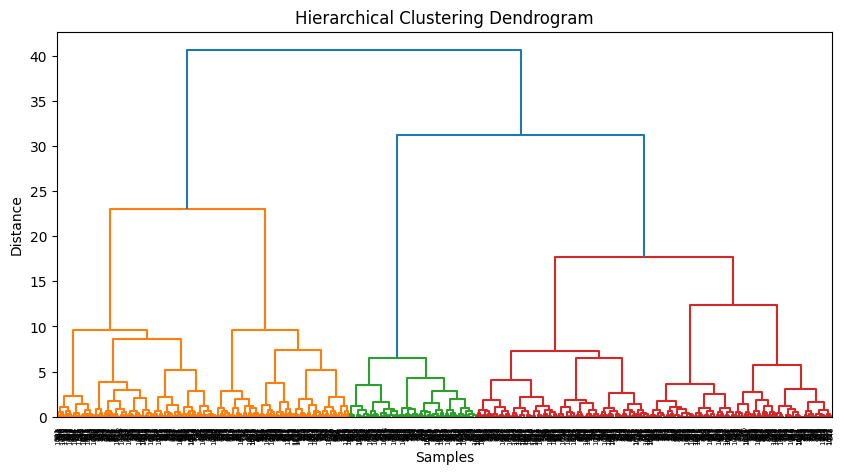

In [8]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [9]:
hc = AgglomerativeClustering(
    n_clusters=4,      
    metric='euclidean',
    linkage='ward'
)

In [10]:
df["Cluster"] = hc.fit_predict(scaled_data)


print("\nClustered Data:")
print(df.head(10))


Clustered Data:
  Gender_Code Region  Income  Spending  Cluster
0      Female  Rural    20.0      15.0        3
1        Male  Rural     5.0      12.0        0
2      Female  Urban    28.0      18.0        3
3        Male  Urban    40.0      10.0        2
4        Male  Urban    42.0       9.0        2
5        Male  Rural    13.0      14.0        0
6        Male  Urban    31.0      10.0        0
7        Male  Rural    18.0       9.0        0
8        Male  Rural    23.0      12.0        3
9      Female  Rural    19.0      20.0        3


In [11]:
clusters = hc.fit_predict(scaled_data)
clusters

array([3, 0, 3, ..., 1, 1, 0], shape=(1113,))

In [12]:
df.groupby("Cluster")[["Income", "Spending"]].mean()


,Income,Spending
Cluster,,
0,17.558185,8.542240
1,40.335079,15.598930
2,42.743169,7.469945
3,19.367257,16.860262


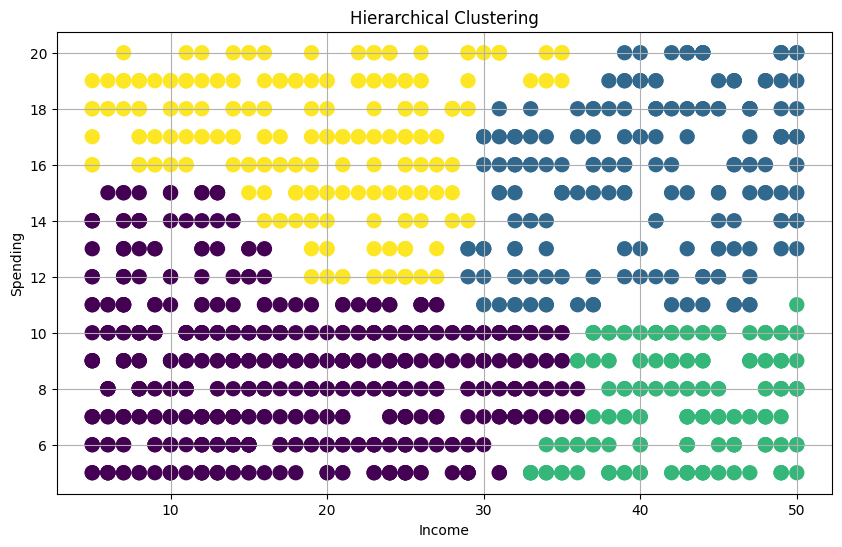

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df["Income"], df["Spending"],
    c=df["Cluster"], s=100
)

plt.title("Hierarchical Clustering")
plt.xlabel("Income")
plt.ylabel("Spending")
plt.grid(True)
plt.show()

In [15]:
import joblib
joblib.dump(scaler,"scaler.pkl")
joblib.dump(hc,"model.pkl")
joblib.dump(scaled_data,"scaled_data.pkl")
joblib.dump(clusters,"clusters.pkl")

['clusters.pkl']